In [ ]:
#reference:https://www.itread01.com/content/1546211528.html
#KNN(K-nearest neighbors)，概念物以類聚
'''
kNN分類:一個物件的分類是由其鄰居的「多數表決」決定，
k個最近鄰居（k為正整數）中最常見的分類決定該物件的類別。

kNN回歸:該值是其k個最近鄰居的值的平均值。
最近鄰居法採用向量空間模型來分類，藉由計算與已知類別案例之相似度，
將這些鄰居的屬性的平均值賦給該樣本，就可以得到該樣本的屬性。 


優點
1.直覺
2.資料量再大都是看幾個鄰居
缺點:
1.解釋性差
2.標籤數量不平均 如:A類100個,B類5個，很難正確找到B類

'''

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris = load_iris()
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


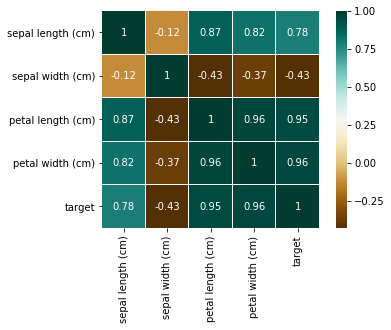

In [2]:
sns.heatmap(df.astype(float).corr(), cmap = 'BrBG',linewidths=0.1, square=True, linecolor= 'White',annot = True)

In [3]:
#切割測試資料
from sklearn.model_selection import train_test_split
data_train, data_test,target_train,target_test = train_test_split(iris['data'], iris['target'],test_size=0.1)

In [4]:
#n_neighbors不要太少(<3)，樣本太少不符合多數表決概念，樣本太多範圍太大
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 8)
clf = clf.fit(data_train,target_train)

In [5]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測",predict)
print("正確標籤",target_test)
print("正確率",accuracy_score(target_test,predict)*100,'%')

預測 [2 2 1 2 0 1 0 2 2 2 1 1 0 0 2]
正確標籤 [2 2 1 2 0 1 0 2 2 2 1 1 0 0 2]
正確率 100.0 %


In [6]:
#混淆矩陣觀察分類錯誤
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test,predict)
pd.DataFrame(cm)

,0,1,2
0,4,0,0
1,0,4,0
2,0,0,7
